
[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>


## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>


## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

In [1]:
# main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка основного датасета

In [2]:
### YOUR CODE HERE ###
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil import relativedelta as rdelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# сохраняем в переменных каждую из таблиц как датафрейм
courses = pd.read_csv('courses.csv', index_col=0)
students = pd.read_csv('students.csv', index_col=0, parse_dates=['birthday'])
course_contents = pd.read_csv('course_contents.csv')
progresses = pd.read_csv('progresses.csv')
progress_phases = pd.read_csv('progress_phases.csv')

# поочередно соединяем датафреймы, где main - основной датафрейм
main = courses.merge(progresses, 
                     left_on='id', 
                    right_on='course_id', 
                      suffixes=('_course', '_progress')).merge(progress_phases, 
                                         right_on='progress_id', 
                                         left_on='id_progress').merge(course_contents, 
                                                               on=['course_id', 'module_number', 'lesson_number'])

# удаляем дубликаты ненужных столбцов, присоединившихся в ходе мержинга
main.drop(['course_id', 'progress_id'], axis=1, inplace=True)

# поменяет тип столбцов с датами на datetime для облегчения дальнейших расчетов
main['start_date'] = pd.to_datetime(main['start_date'], format='%Y-%m-%d %H:%M:%S')
main['finish_date'] = pd.to_datetime(main['finish_date'], format='%Y-%m-%d %H:%M:%S')
students['birthday'] = pd.to_datetime(students['birthday'], errors='coerce')
#игнорируем ошибку в случае ее появления


# выводим часть данных для ознакомления с результатом
main.head()

,id_course,title,field,id_progress,student_id,module_number,lesson_number,status,start_date,finish_date,module_title,lesson_title,lesson_token,is_video,is_homework
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86,1,4,done,2019-06-23 09:26:28.137853+00:00,2019-06-23 09:26:29.900389+00:00,Вводный модуль,Установка среды разработки,0ac58921-5765-40aa-aec9-544f8313e3f6,True,False
1,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,0c56109dde49080e7441e95b22bb73c2,1d874e6b6bdc34559781f65f9f761791,1,4,done,2019-06-16 19:15:44.044814+00:00,2019-06-16 19:26:05.020204+00:00,Вводный модуль,Установка среды разработки,0ac58921-5765-40aa-aec9-544f8313e3f6,True,False
2,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,36079c0615d85f3cebfa47542b43ab41,ab7f5c720e3a5e1de00c2cdbef19fbf0,1,4,done,2019-03-27 06:56:59.245938+00:00,2019-03-27 06:57:01.575146+00:00,Вводный модуль,Установка среды разработки,0ac58921-5765-40aa-aec9-544f8313e3f6,True,False
3,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,37384cbeb141835cc61b5fd22abd9200,29ab3f8c52a858bea2d3b9a51c433578,1,4,done,2019-05-29 15:46:22.132215+00:00,2019-05-29 17:54:26.328198+00:00,Вводный модуль,Установка среды разработки,0ac58921-5765-40aa-aec9-544f8313e3f6,True,False
4,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,e8be94e53115096efe668ed944e9b52b,e8d90fa64a43ebf9a13fa32d128098bc,1,4,done,2019-03-25 16:36:14.273344+00:00,2019-03-25 16:36:24.107632+00:00,Вводный модуль,Установка среды разработки,0ac58921-5765-40aa-aec9-544f8313e3f6,True,False


In [3]:
# выводим для дальнейшей работы информацию о типе данных и нулевых значения в датафрейме
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   id_course      350677 non-null  object             
 1   title          350677 non-null  object             
 2   field          350677 non-null  object             
 3   id_progress    350677 non-null  object             
 4   student_id     350677 non-null  object             
 5   module_number  350677 non-null  int64              
 6   lesson_number  350677 non-null  int64              
 7   status         350677 non-null  object             
 8   start_date     350677 non-null  datetime64[ns, UTC]
 9   finish_date    334508 non-null  datetime64[ns, UTC]
 10  module_title   350677 non-null  object             
 11  lesson_title   350677 non-null  object             
 12  lesson_token   350677 non-null  object             
 13  is_video       350677 non-nul

In [4]:
# Определим, каков процент нулевых значений в столбце finish_date
not_finished = round((main['finish_date'].isnull().sum())/(len(main))*100, 2)
print(not_finished, '%')

4.61 %


In [5]:
# Определяем количество курсов
number_of_courses = main['title'].drop_duplicates()
amount_of_courses = number_of_courses.shape[0]
print('Количество курсов:')
amount_of_courses

Количество курсов:


15

In [6]:
# Определяем количество модулей на каждом курсе с помощью группировки и агрегирующей функции счета
modules = main[['title', 'module_number']].drop_duplicates().groupby('title').agg('count')
print('Таблица с модулями по каждому курсу')
modules

Таблица с модулями по каждому курсу


,module_number
title,
Excel Базовый,9
Java-разработчик,17
Java-разработчик c нуля,9
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,8
SMM-маркетолог от А до Я,11
UX-дизайн,20
Анимация интерфейсов,21
Веб-вёрстка для начинающих 2.0,8


In [7]:
# находи среднее количество модулей по рассматриваемым курсам
modules.mean().round()

module_number    15.0
dtype: float64

In [8]:
#Определяем количество уроков в каждом модуле с помощью группировки 
# по столбцам с названием курса и модуля и агрегирующей функцией счет
lessons = main[['title', 'module_number', 'module_title', 'lesson_token']].drop_duplicates().groupby(['title', 'module_number', 'module_title']).agg('count').reset_index()
# смотрим данные
print('Количество уроков в каждом модуле на каждом курсе')
lessons.head()

Количество уроков в каждом модуле на каждом курсе


,title,module_number,module_title,lesson_token
0,Excel Базовый,1,Основной функционал Excel,11
1,Excel Базовый,2,Основной функционал Excel (продолжение),7
2,Excel Базовый,3,Формулы и функции Excel. Введение,3
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,7
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,5


In [9]:
lessons[lessons.lesson_token == lessons.lesson_token.max()]

,title,module_number,module_title,lesson_token
209,Интернет-маркетолог от Ingate,16,Email-маркетинг,29


In [10]:
lessons[lessons.lesson_token == lessons.lesson_token.min()].describe(include=np.object)

,title,module_title
count,35,35
unique,12,30
top,UX-дизайн,Бонус-модуль #3
freq,8,2


In [11]:
# Определяем медианное количество уроков в модуле на каждом курсе на основании созданного ранее датафрейма lesson
# с помощью группировки и агрегирующей функцией нахождения медианы
median_lessons = lessons[['title', 'lesson_token']].groupby('title').agg('median')
print('Медианное количество уроков в модуле на каждом курсе')
median_lessons

Медианное количество уроков в модуле на каждом курсе


,lesson_token
title,
Excel Базовый,5.0
Java-разработчик,7.0
Java-разработчик c нуля,13.0
JavaScript с нуля,7.0
PHP-разработчик с 0 до PRO. Часть 1,4.0
SMM-маркетолог от А до Я,6.0
UX-дизайн,3.5
Анимация интерфейсов,3.0
Веб-вёрстка для начинающих 2.0,7.0


In [12]:
# Определяем количество учеников на каждом курсе
students_amount = main[['title', 'field', 'student_id']].drop_duplicates().groupby(['title', 'field']).agg('count').sort_values('student_id', ascending=False)
print('Kоличество учеников на каждом курсе')
students_amount

Kоличество учеников на каждом курсе


,,student_id
title,field,
Интернет-маркетолог от Ingate,Marketing,2168
Веб-дизайн с нуля 2.0,Design,2014
Веб-вёрстка для начинающих 2.0,Development,2004
Веб-дизайн PRO 2.0,Design,1711
UX-дизайн,Design,1151
JavaScript с нуля,Development,966
PHP-разработчик с 0 до PRO. Часть 1,Development,854
Excel Базовый,Business,782
Java-разработчик,Development,763


Text(0.5, 1.0, 'Kоличество учеников на каждом курсе')

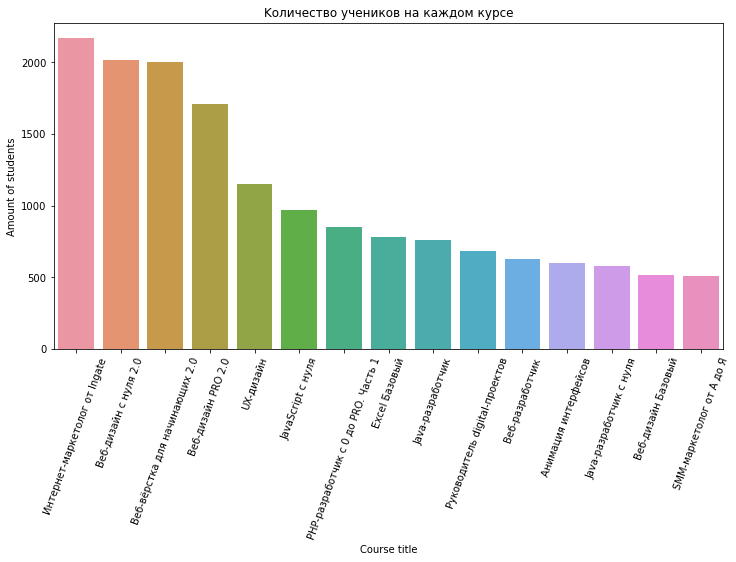

In [13]:
# устанавливаем размеры графика
plt.figure(figsize=(12, 6))
# строим барплот
sns.barplot(data=students_amount.reset_index(), y='student_id', x='title')
# поворачиваем тикс на 70 градусов для читаемости
plt.xticks(rotation=70)
# даем название оси х
plt.xlabel('Course title')
# даем название оси у
plt.ylabel('Amount of students')
# даем название графику
plt.title('Kоличество учеников на каждом курсе')

Text(0.5, 1.0, 'Kоличество учеников на каждом курсе')

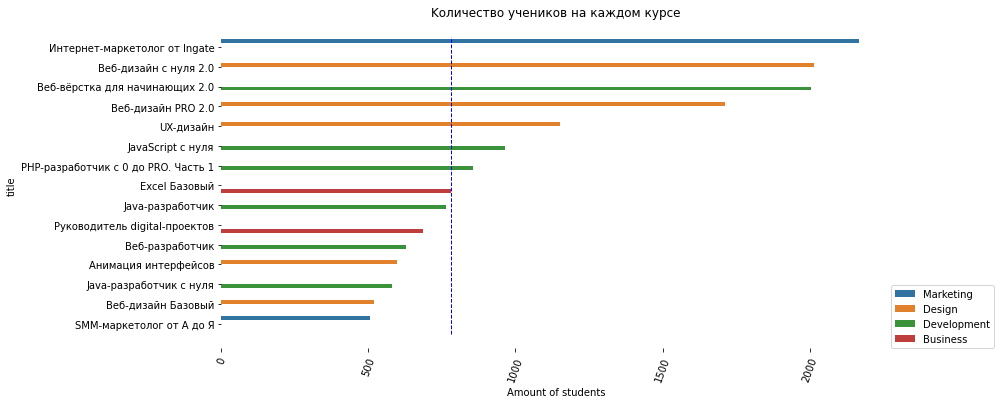

In [14]:
# устанавливаем размер графика
plt.figure(figsize=(12, 6))
# строим горизонтальный барплот с легендой
sns.barplot(data=students_amount.reset_index(), x='student_id', y='title', orient='h', hue='field').set_alpha(.1)
# поворачиваем тикс на 70 градусов для читаемости
plt.xticks(rotation=70)
# даем название оси х
plt.xlabel('Amount of students')
# меняем положение легенды на удобное
plt.legend(loc=[1,0])
# убираем границы графика
plt.box(on=None)
# рисуем вертикальную линию по медианному значению
plt.vlines(students_amount['student_id'].median(), 14.5, -0.5, colors='b', linewidth=1, linestyle='--')
# называем график
plt.title('Kоличество учеников на каждом курсе')


In [15]:
# изучаем тип данных в датафрейме students
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43830 entries, 1325 to 124445
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        43830 non-null  object        
 1   city      13162 non-null  object        
 2   birthday  25490 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.3+ MB


min       16.000000
max       62.000000
mean      30.226412
median    30.000000
Name: age, dtype: float64

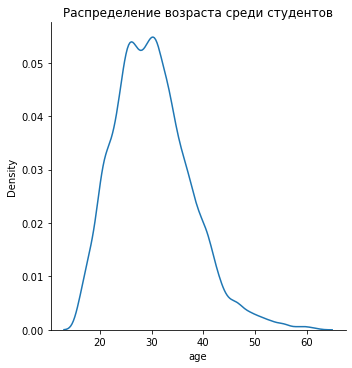

In [16]:
# Найдем возраст наших студентов
age=[]
# пропускаем через цикл каждое значение, отнимаем его от сегодняшней даты, затем отбрасываем аномальные значения
for date in students['birthday']:
    try:
        aage = rdelta.relativedelta(datetime.today(), date).years
        if 16 <= aage < 63:
            age.append(aage)
        else:
            age.append(None)
    except AssertionError:
        age.append(None)
# Создаем новый столбец с возрастом
students['age']=age
# Смотрим распределение
sns.displot(students[students['age'] > 0]['age'], kind='kde')
# даем название графику
plt.title('Распределение возраста среди студентов')
# Минимальный, максимальный, средний, медианный возраст студентов
students['age'].agg(['min', 'max', 'mean', 'median'])


При формировании списка с возрастом каждого участника следует отметить, что ошибочными данными признаются значения возраста, выходящие за рамки трудоспособного.  
Такое решение принято ввиду того, что платформа носит обучающий характер в отношении рабочих навыков.  
Также отмечаем, что для игнорирования пропущенных значений возраста используется пропуск AssertionError.  
Построенное распределение по значению возраст можно отнести к нормальному

In [17]:
#  создаем датафрейм на основании мержинга существующих, содержащий информацию о курсах и возрасте студентов на нем
course_age = main[['title', 'student_id']].merge(students[['id', 'age']], right_on='id', left_on='student_id')
# с помощью группировки по названию курса 
# узнаем минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
course_age.groupby('title').agg({'age': ['min', 'max', 'mean', 'median']})

age                        
                                      min   max       mean median
title                                                            
Excel Базовый                        17.0  62.0  34.159247   34.0
Java-разработчик                     16.0  56.0  30.671681   30.0
Java-разработчик c нуля              16.0  56.0  30.977628   30.0
JavaScript с нуля                    16.0  60.0  29.559609   29.0
PHP-разработчик с 0 до PRO. Часть 1  16.0  60.0  31.768673   31.0
SMM-маркетолог от А до Я             18.0  53.0  29.881474   29.0
UX-дизайн                            16.0  58.0  31.265228   31.0
Анимация интерфейсов                 16.0  52.0  30.797070   30.0
Веб-вёрстка для начинающих 2.0       16.0  60.0  29.683639   29.0
Веб-дизайн PRO 2.0                   16.0  60.0  29.463689   28.0
Веб-дизайн Базовый                   17.0  52.0  29.543211   29.0
Веб-дизайн с нуля 2.0                16.0  60.0  29.102176   28.0
Веб-разработчик                      17.0  52.0  28.585262   28.0
Интернет-маркетолог от Ingate        17.0  61.0  32.383389   31.0
Руководитель digital-проектов        19.0  56.0  32.865441   32.0

## Выводы по блоку 1 ##

* Данные представлены в виде датафрейма с 350677 записями, имеющими 15 атрибутов.
* Данные представлены в следующих типах: object (9), bool (2), datetime64 (2), int64 (2)
* В целом датафрейм не имеет нулевых значений, за исключение колонки с окончанием выполнения урока.  Это говорит о том, что некоторые студенты либо забросили обучение, либо находятся еще в процессе обучения.
* Около ***4,61%*** уроков, проходимых студентами, из общего массива еще не пройдены и находятся на стадии изучения. 
* Мы будем рассматривать 15 курсов:
     * Excel Базовый
     * Java-разработчик
     * Java-разработчик c нуля
     * JavaScript с нуля
     * PHP-разработчик с 0 до PRO. Часть 1
     * SMM-маркетолог от А до Я
     * UX-дизайн
     * Анимация интерфейсов
     * Веб-вёрстка для начинающих 2.0
     * Веб-дизайн PRO 2.0
     * Веб-дизайн Базовый
     * Веб-дизайн с нуля 2.0
     * Веб-разработчик
     * Интернет-маркетолог от Ingate	
     * Руководитель digital-проектов
* В каждом курсе в среднем 15 модулей.  Меньше всего модулей на курсах "Веб-вёрстка для начинающих 2.0" (8), "PHP-разработчик с 0 до PRO. Часть 1" (8). Больше всего модулей на курсах "Анимация интерфейсов" (21),  "UX-дизайн" (20) и "Веб_разработчик" (20).
* Количество уроков на модуле разниться от курса к курсу.  Так, больше всего уроков (29) на курсе "Интернет-маркетолог от Ingate" в модуле 16 "Email-маркетинг".  Меньше всего уроков (1) в модулях чаще всего на курсе "UX-дизайн".  В остальных курсах 1 урок в модуле - это чаще всего экзаменнационная/курсовая работа или бонус-урок.
* Медианно больше всего уроков (13) в модулях на курсе "Java-разработчик c нуля".  Меньше всего (2) на курсе "Веб-разработчик".
* Больше всего студентов учится на курсах "Интернет-маркетолог от Ingate" (2168), "Веб-дизайн с нуля 2.0" (2014) и "Веб-вёрстка для начинающих 2.0" (2004).  Меньше всего - "Java-разработчик c нуля" (581), "Веб-дизайн Базовый" (518), "SMM-маркетолог от А до Я"	(506).  Таким образом, можно сделать вывод о том, что повышен интерес среди студентов вообще к интернет индустрии и дизайну.
* Средний возраст студентов - 30 лет. Минимальным возрастом и максимальным являются 16 и 62 года соответственно.  *Cледует отметить, что данные границы выбраны по причине трудоспособного возраста, где есть интерес к профросту. В необработанном датафрейме эти показатели отличаются.*
* Отмечаем, что самым младшему студенту на курсе "Руководитель digital-проектов" 19 лет ввиду освоения руководящей должности.
* Самые молодые студенты (до 52 лет включительно) обучаются на курсах "Анимация интерфейсов", "Веб-разработчик" и "Веб-дизайн Базовый".
* На курсе "Excel Базовый" аудитория наиболее разнообразна по возрастному критерию (от 16 до 62) и средний возраст студентов высок относительно остальных курсов (34 года). 


## 2. Расчет потенциальной нагрузки на преподавателей


In [18]:
### YOUR CODE HERE ###  
# формируем промежуточный датасет, в котором указывается только название курса, 
# id студента и дата его первой домашней работы
df2=main[(main.is_homework == True)]
df2['date_hw'] = df2.start_date.dt.to_period('M')
df2=df2[(df2.date_hw >= '2016-03')&(df2.start_date < '2019-08')].sort_values(['student_id','date_hw'])
s = df2.pivot_table(values='date_hw', index=['title','student_id'], 
                    columns=['module_number'], aggfunc='first').reset_index().astype(object).replace(pd.NaT, np.nan).fillna(method='bfill', axis='columns').loc[:,['title', 'student_id', 1]].fillna(0)
# создаем датафрейм с количестивом студентов, на основании которого будет рассчитываться процент прироста
student_change=s.groupby(['title', 1]).agg({'student_id':'nunique'})
# в цикле считаем значения процентного изменения и сохраняем в список change
change=[]
for i in sorted((main['title'].drop_duplicates()).tolist()):
    for j in round(student_change.loc[i]['student_id'].pct_change()*100):
        change.append(j)
# передаем рассчитанные значения в столбец change 
student_change['change'] = change
print('Прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно)')
student_change


Прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно)


student_id  change
title                         1                          
Excel Базовый                 2018-02           6     NaN
                              2018-03           3   -50.0
                              2018-05           3     0.0
                              2018-06           9   200.0
                              2018-07          13    44.0
...                                           ...     ...
Руководитель digital-проектов 2019-03          36    24.0
                              2019-04          17   -53.0
                              2019-05          25    47.0
                              2019-06          15   -40.0
                              2019-07          20    33.0

[244 rows x 2 columns]

Text(0.5, 0.89, 'Динамика роста студентов на каждом курсе')

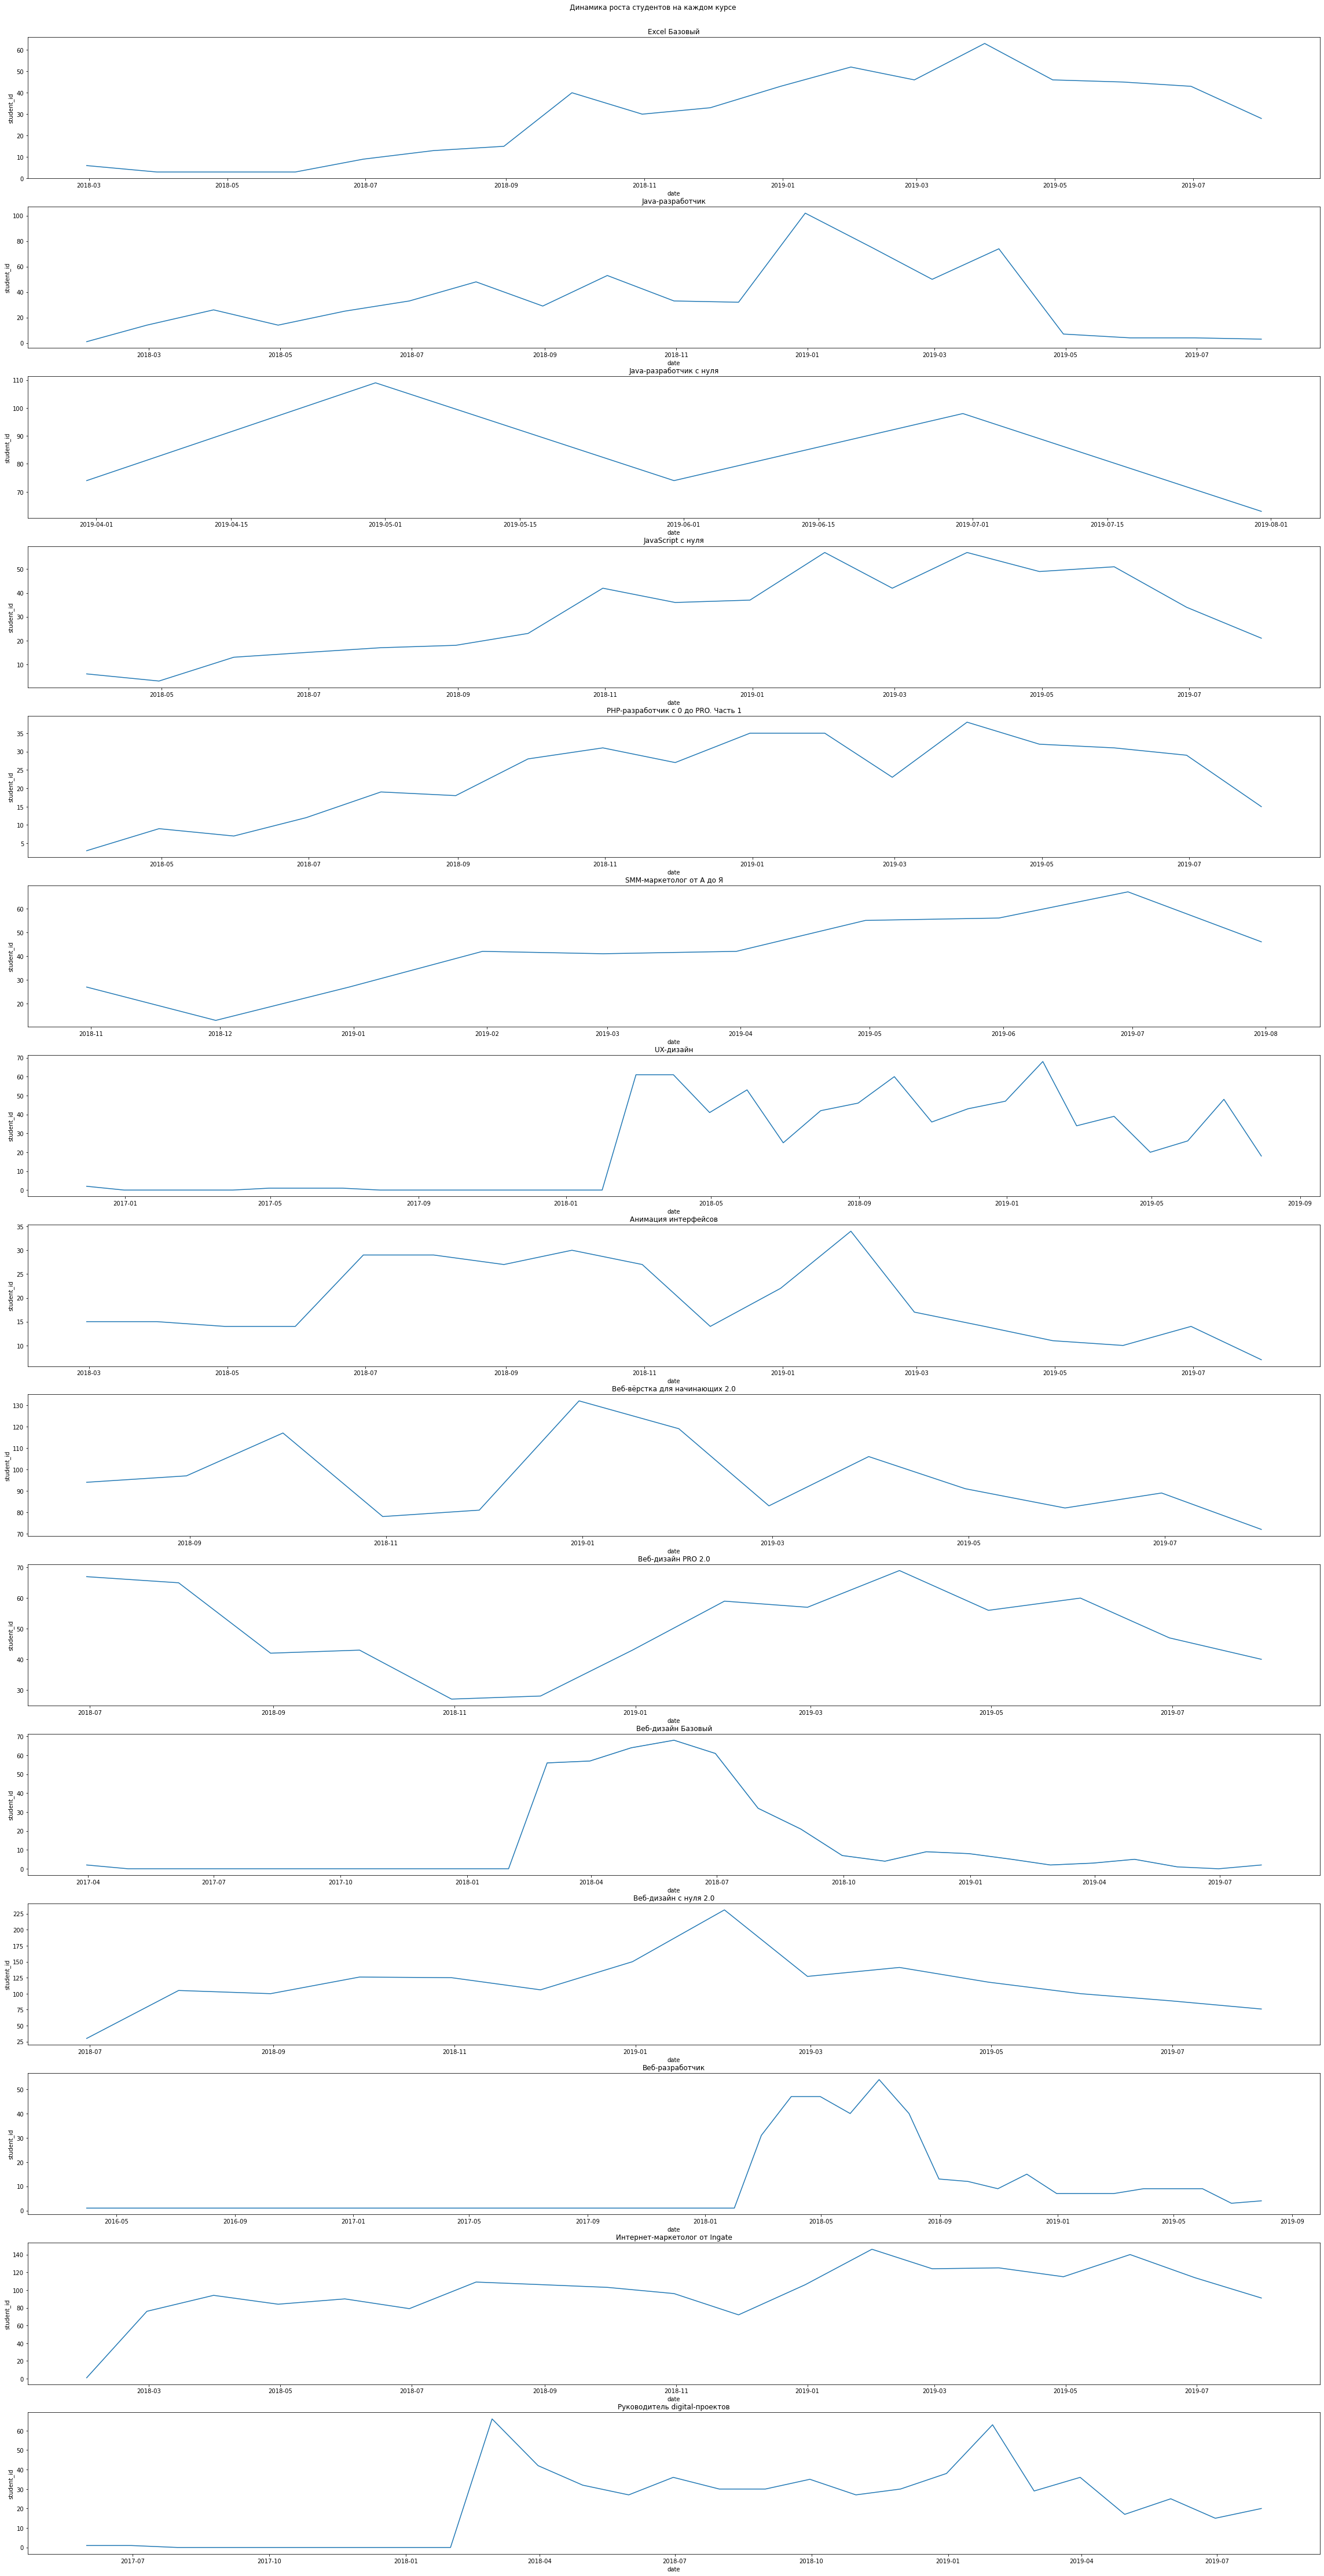

In [19]:
# делаем переиндексацию для более удобной работы
student_change = student_change.reset_index()
# меняем название колонок для комфорта
student_change.columns = ['title', 'date', 'student_id', 'change']
# меняем тип данных дат, чтобы можно было построить на основании их график
student_change['date'] = [i.to_timestamp(freq='M') for i in student_change.date]
# создаем промежуточный датафрейм, в котором нет данных по курсам, где пропущены месяцы
df22 = student_change[(student_change.title !='Руководитель digital-проектов')&(student_change.title != 'UX-дизайн')&(student_change.title != 'Веб-разработка Базовый')]

# циклом добавляемм к датафрейму данные за заданный промежуток времени по каждому проблемному курсу
for i in ['Руководитель digital-проектов', 'UX-дизайн', 'Веб-дизайн Базовый']:    
    dp=student_change[student_change['title']==i].set_index('date').resample('M').asfreq()
    dp['title']=dp['title'].fillna(method='bfill')
    dp['student_id'] = dp['student_id'].fillna(0)
    df22=df22.append(dp.reset_index())

# создаем полотно с 15 графиками
fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(40, 80))
# с помощью цикла заполняем каждый график информацией по курсу
for n, name in enumerate(sorted((main['title'].drop_duplicates()).tolist())):
    sns.lineplot(data=df22[df22['title'] == name], x = 'date' , y = 'student_id', ax = ax.ravel()[n])
    ax.ravel()[n].set_title(name)
# даем название графикам
fig.suptitle('Динамика роста студентов на каждом курсе', y=.89)

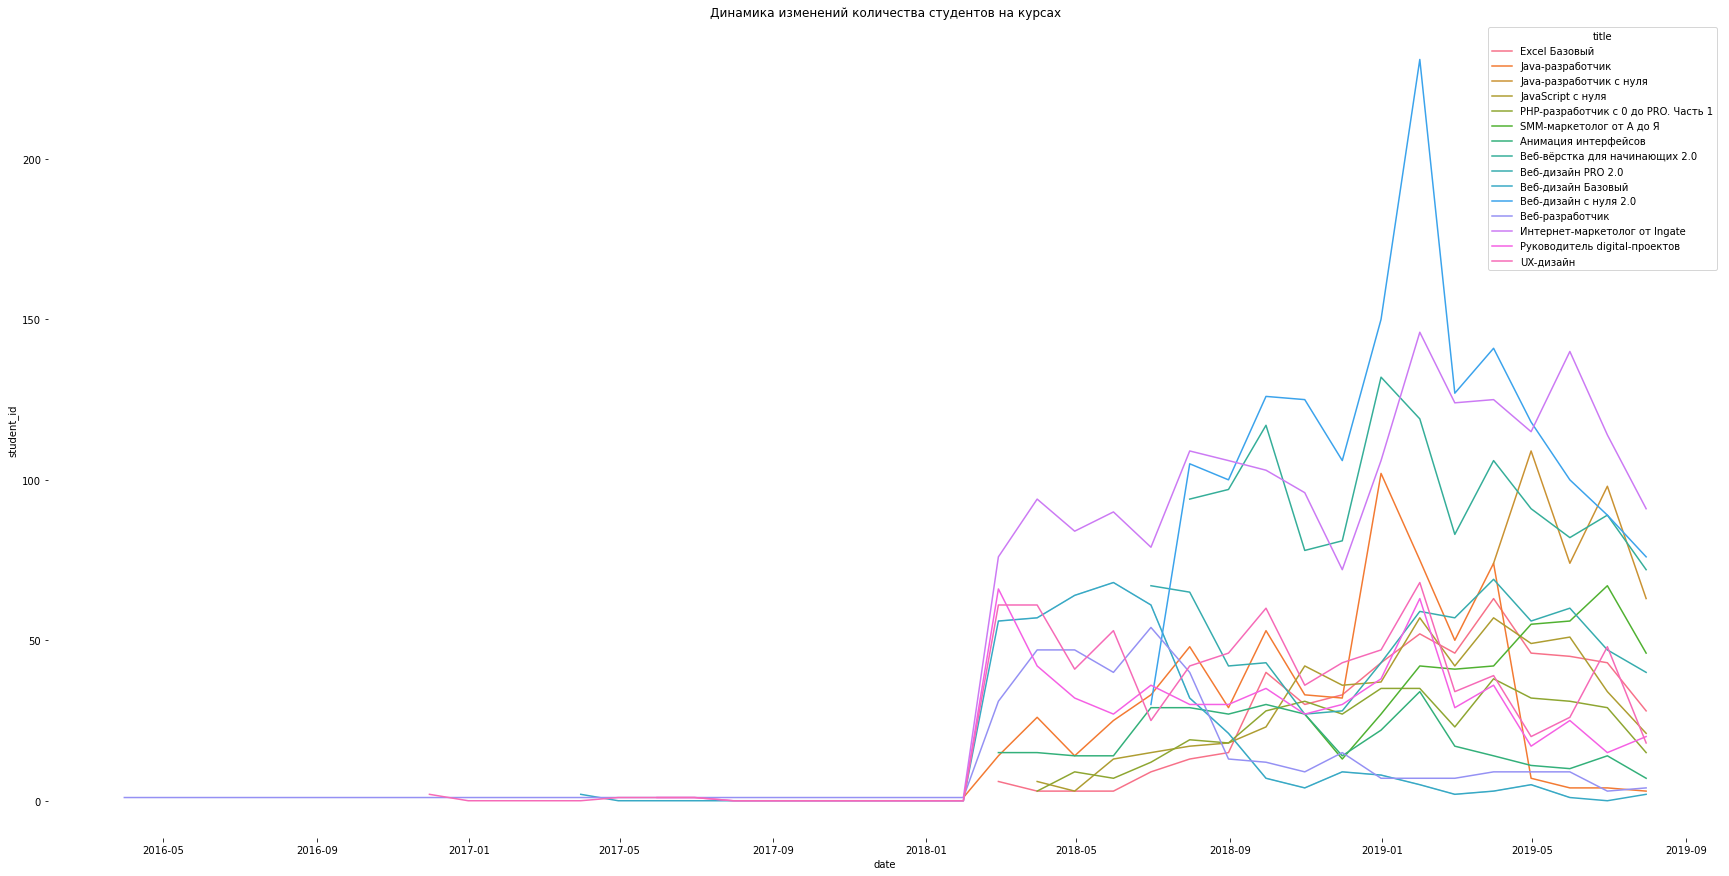

In [20]:
# создаем полотно для графика
fig, ax = plt.subplots(ncols=1, nrows=1)
# устанавливаем размеры полотна
fig.set_figheight(15)
fig.set_figwidth(30)
# строим один график с данными по всем курсам
sns.lineplot(data=df22, x='date', y='student_id', hue='title')
# даем название гарфике
ax.set_title('Динамика изменений количества студентов на курсах')
# удалем границы графика
sns.despine(left=True, bottom=True, right=True)

In [21]:
# создаем промежуточный столбец для работы
df3=main[main.is_homework == True][['title', 'id_progress', 'start_date', 'finish_date']]
# # записываем функцию, с помощью которой будем делать расчет финальной даты при формировании date_range
def mth(date):
    if date.month == 12:
        return date.replace(year=date.year + 1, month=1, day=1, hour=0, minute=0, second=0, microsecond=0)
    else:
        return date.replace(day=1, month=date.month+1, hour=0, minute=0, second=0, microsecond=0)
# # заменяем все незаконченные работы максимальной датой выполнения работ,
# # так как она должна учитываться в прогрессе, но даже на самую позднюю дату выполнения работы, дз не выполнено
df3.finish_date = df3.finish_date.replace(pd.NaT, df3.finish_date.max())
# # формируем список из месяцев и годов, в течение которых делалась работа
df3['ddate'] = df3[['start_date', 'finish_date']].apply(lambda x: pd.date_range(x['start_date'].replace(day=1, hour=0, minute=0, 
                                                                                                        second=0, microsecond=0), mth(x['finish_date']), 
                                                                                freq=pd.offsets.MonthBegin(1), closed='left'), axis=1)
# # растягиваем список по строкам в датафрейме
df3=df3.explode('ddate')
# # # конвертируем в месяц и год
df3['ddate']=df3.ddate.dt.to_period('M')
# # # считаем количество прогрессов с помощью групбай
progress = df3.groupby(['title', 'ddate']).agg({'id_progress':'count'}).reset_index()
# # # выводим результат
print('Количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса')
progress

Количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса


,title,ddate,id_progress
0,Excel Базовый,2018-02,37
1,Excel Базовый,2018-03,9
2,Excel Базовый,2018-04,16
3,Excel Базовый,2018-05,21
4,Excel Базовый,2018-06,41
...,...,...,...
253,Руководитель digital-проектов,2019-03,705
254,Руководитель digital-проектов,2019-04,641
255,Руководитель digital-проектов,2019-05,668
256,Руководитель digital-проектов,2019-06,643


Text(0.5, 0.89, 'Динамика прогрессов студентов на каждом курсе')

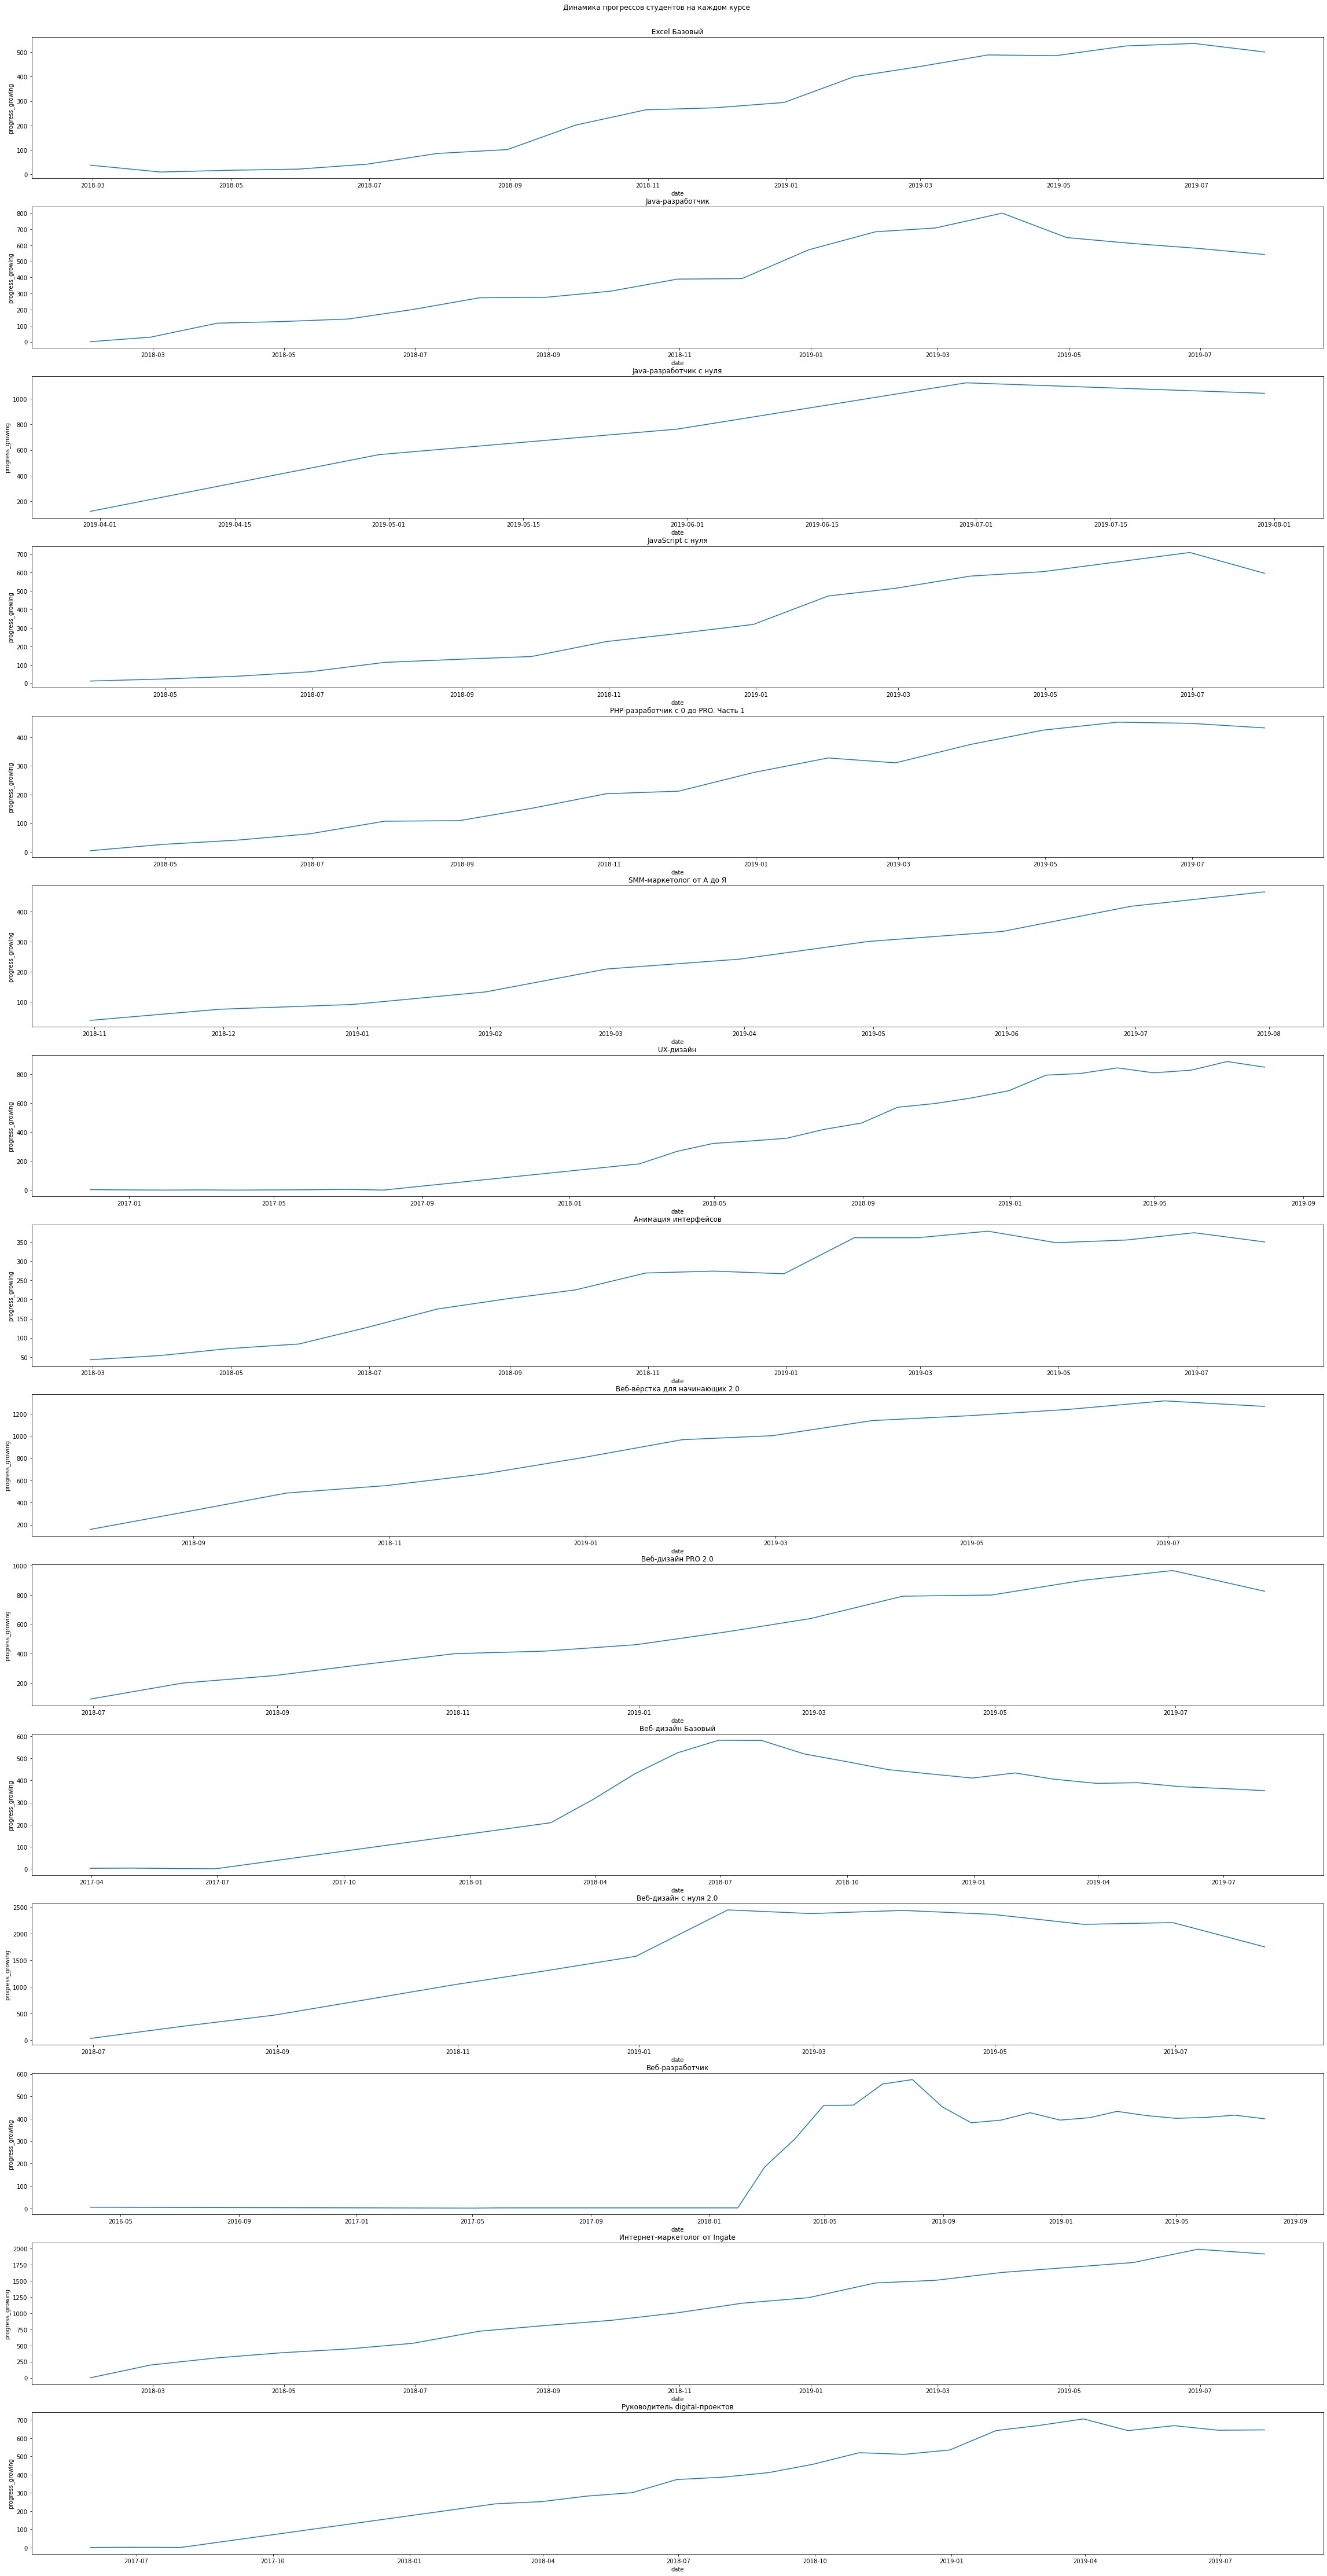

In [22]:
# конвертируем дату в необходимый формат, чтобы построить в последующем график
progress['date'] = [i.to_timestamp(freq='M') for i in progress.ddate]
# устанавливаем указанный промежуток
progress = progress[(progress.date >= '2016-03-01')&(progress.date < '2019-08-01')]
# создаем полотно с 15 графиками
fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(40, 80))
# в цикле строим 15 графиков для каждого курса
for n, name in enumerate(sorted((main['title'].drop_duplicates()).tolist())):
    sns.lineplot(data=progress[progress['title'] == name], x = 'date' , y = 'id_progress', ax = ax.ravel()[n])
    ax.ravel()[n].set_ylabel('progress_growing')
    ax.ravel()[n].set_title(name)
# даем название графикам
fig.suptitle('Динамика прогрессов студентов на каждом курсе', y=.89)

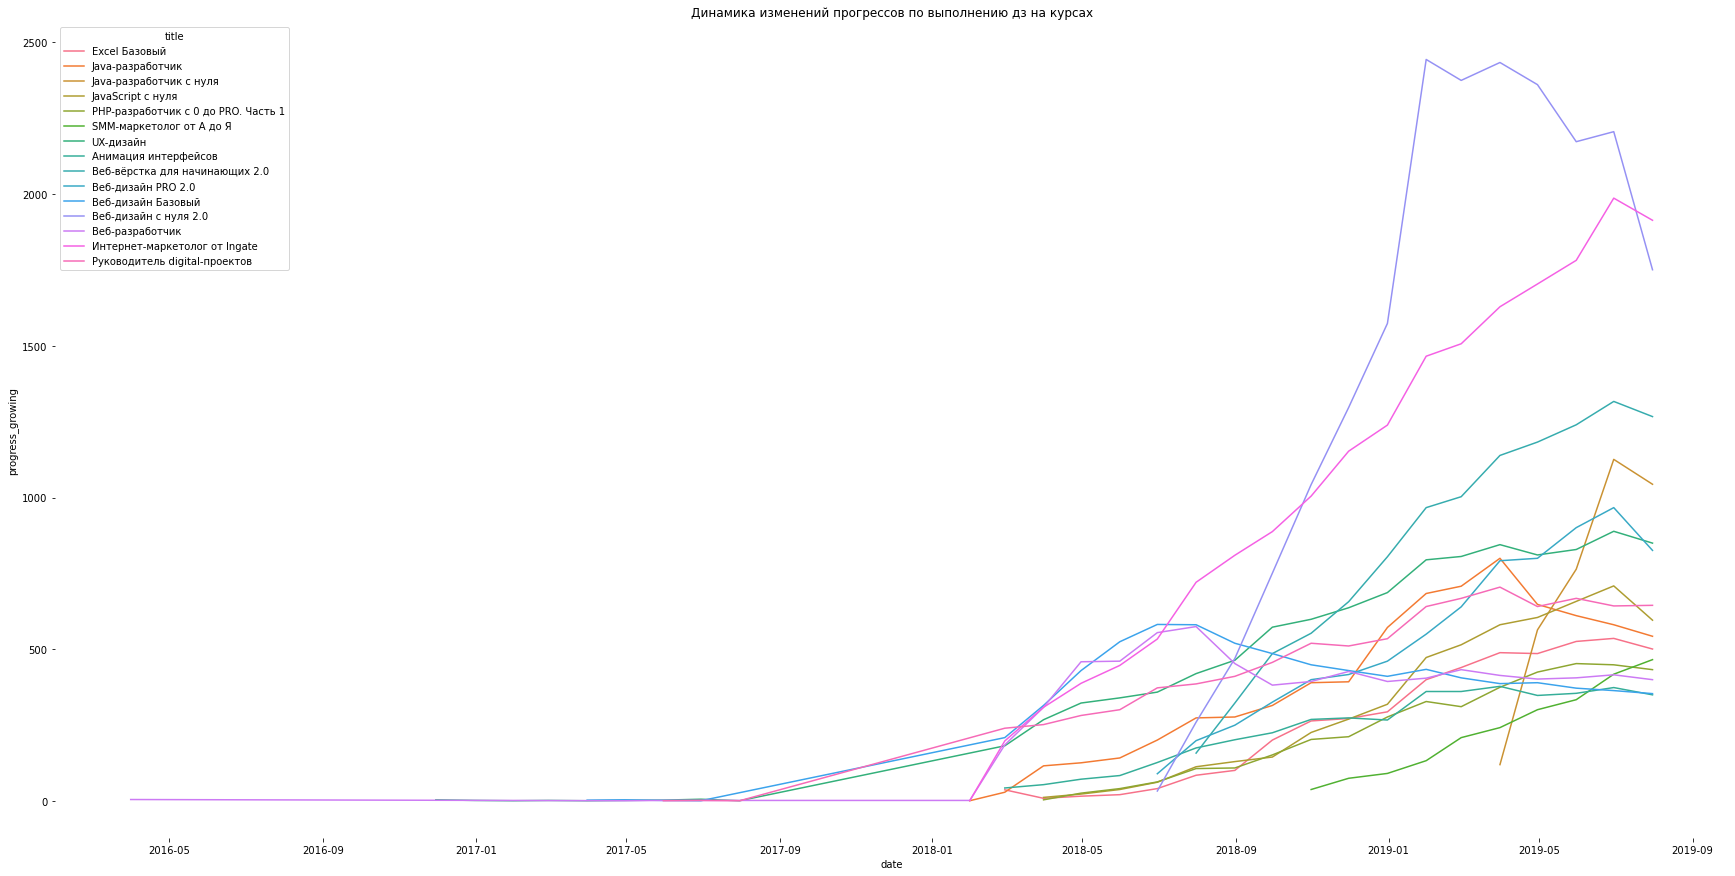

In [23]:
# создаем полотно с графиком
fig, ax = plt.subplots(ncols=1, nrows=1)
# устанавливаем размеры полотна
fig.set_figheight(15)
fig.set_figwidth(30)
# строим график изменения прогрессов по дз по всем курсам
sns.lineplot(data=progress, x='date', y='id_progress', hue='title')
# устанавливаем заголовок графика
ax.set_title('Динамика изменений прогрессов по выполнению дз на курсах')
# меняем название оси у
ax.set_ylabel('progress_growing')
# убираем границы графика
sns.despine(left=True, bottom=True, right=True)

## Выводы по блоку 2 ##

Исходя из полученных данных можно придти к следующим выводам:
* В целом со временем идет прирост студентов на курсах. Основная точка роста наступала в марте 2018 года.  Затем идет достижение пика в приросте в первой половине 2019 года, а затем плавное снижение. За рассматриваемый период под конец нагрузка на преподавателей снижается.  Наиболее примечателен скачек роста на курсах "Веб-дизайн с нуля 2.0" и "Java-разработка" в первом квартале 2019.  Значительный скачок и резкий упадок видется на курсах "Веб-разработка", "Веб-дизайн Базовый" и "Java-разработка".  На остальных курсах ситуация в целом стабильная, не сильно выбивающаяся из общей картины.
* Прогрессы по курсам имеют, в целом, положительную динамику. Стоит отметить резкий скачок изменение прогресса по курсам "Веб-дизайн с нуля 2.0" и "Java-разработка", что объясняется положительным приростом студентов. Изменение прогресса имеет отрицательную динамику на курсах "Веб-дизайн Базовый" и "Веб-разработка" после первой половины 2018. Это может быть связано с отрицательным приростом студентов, указанном в предыдущем пункте.

## 3. Выявление проблемных модулей


In [24]:
# YOUR CODE HERE ###
modul_progss = main[(main.is_homework == True)][main.status == 'done']
modul_progss = modul_progss.groupby(['title', 'module_number', 'student_id']).agg({'start_date':'first', 'finish_date':'last'})
modul_progss['time']=(modul_progss.finish_date - modul_progss.start_date).apply(lambda x: x.days)
modul_progss_1 = modul_progss[modul_progss.time > 0].groupby(['title', 'module_number']).agg({'time':['min', 'max', 'median']}).reset_index()
print('Минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса')
modul_progss_1

Минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса


title module_number time            
                                                  min  max median
0                    Excel Базовый             1    1  183    2.0
1                    Excel Базовый             2    1  184    2.0
2                    Excel Базовый             3    1   89    2.0
3                    Excel Базовый             4    1  327    4.0
4                    Excel Базовый             5    1  175    4.0
..                             ...           ...  ...  ...    ...
185  Руководитель digital-проектов            12    1  211    8.0
186  Руководитель digital-проектов            13    1  246   14.5
187  Руководитель digital-проектов            14    1  199    9.0
188  Руководитель digital-проектов            15    1  132    4.5
189  Руководитель digital-проектов            16    1  355    7.0

[190 rows x 5 columns]

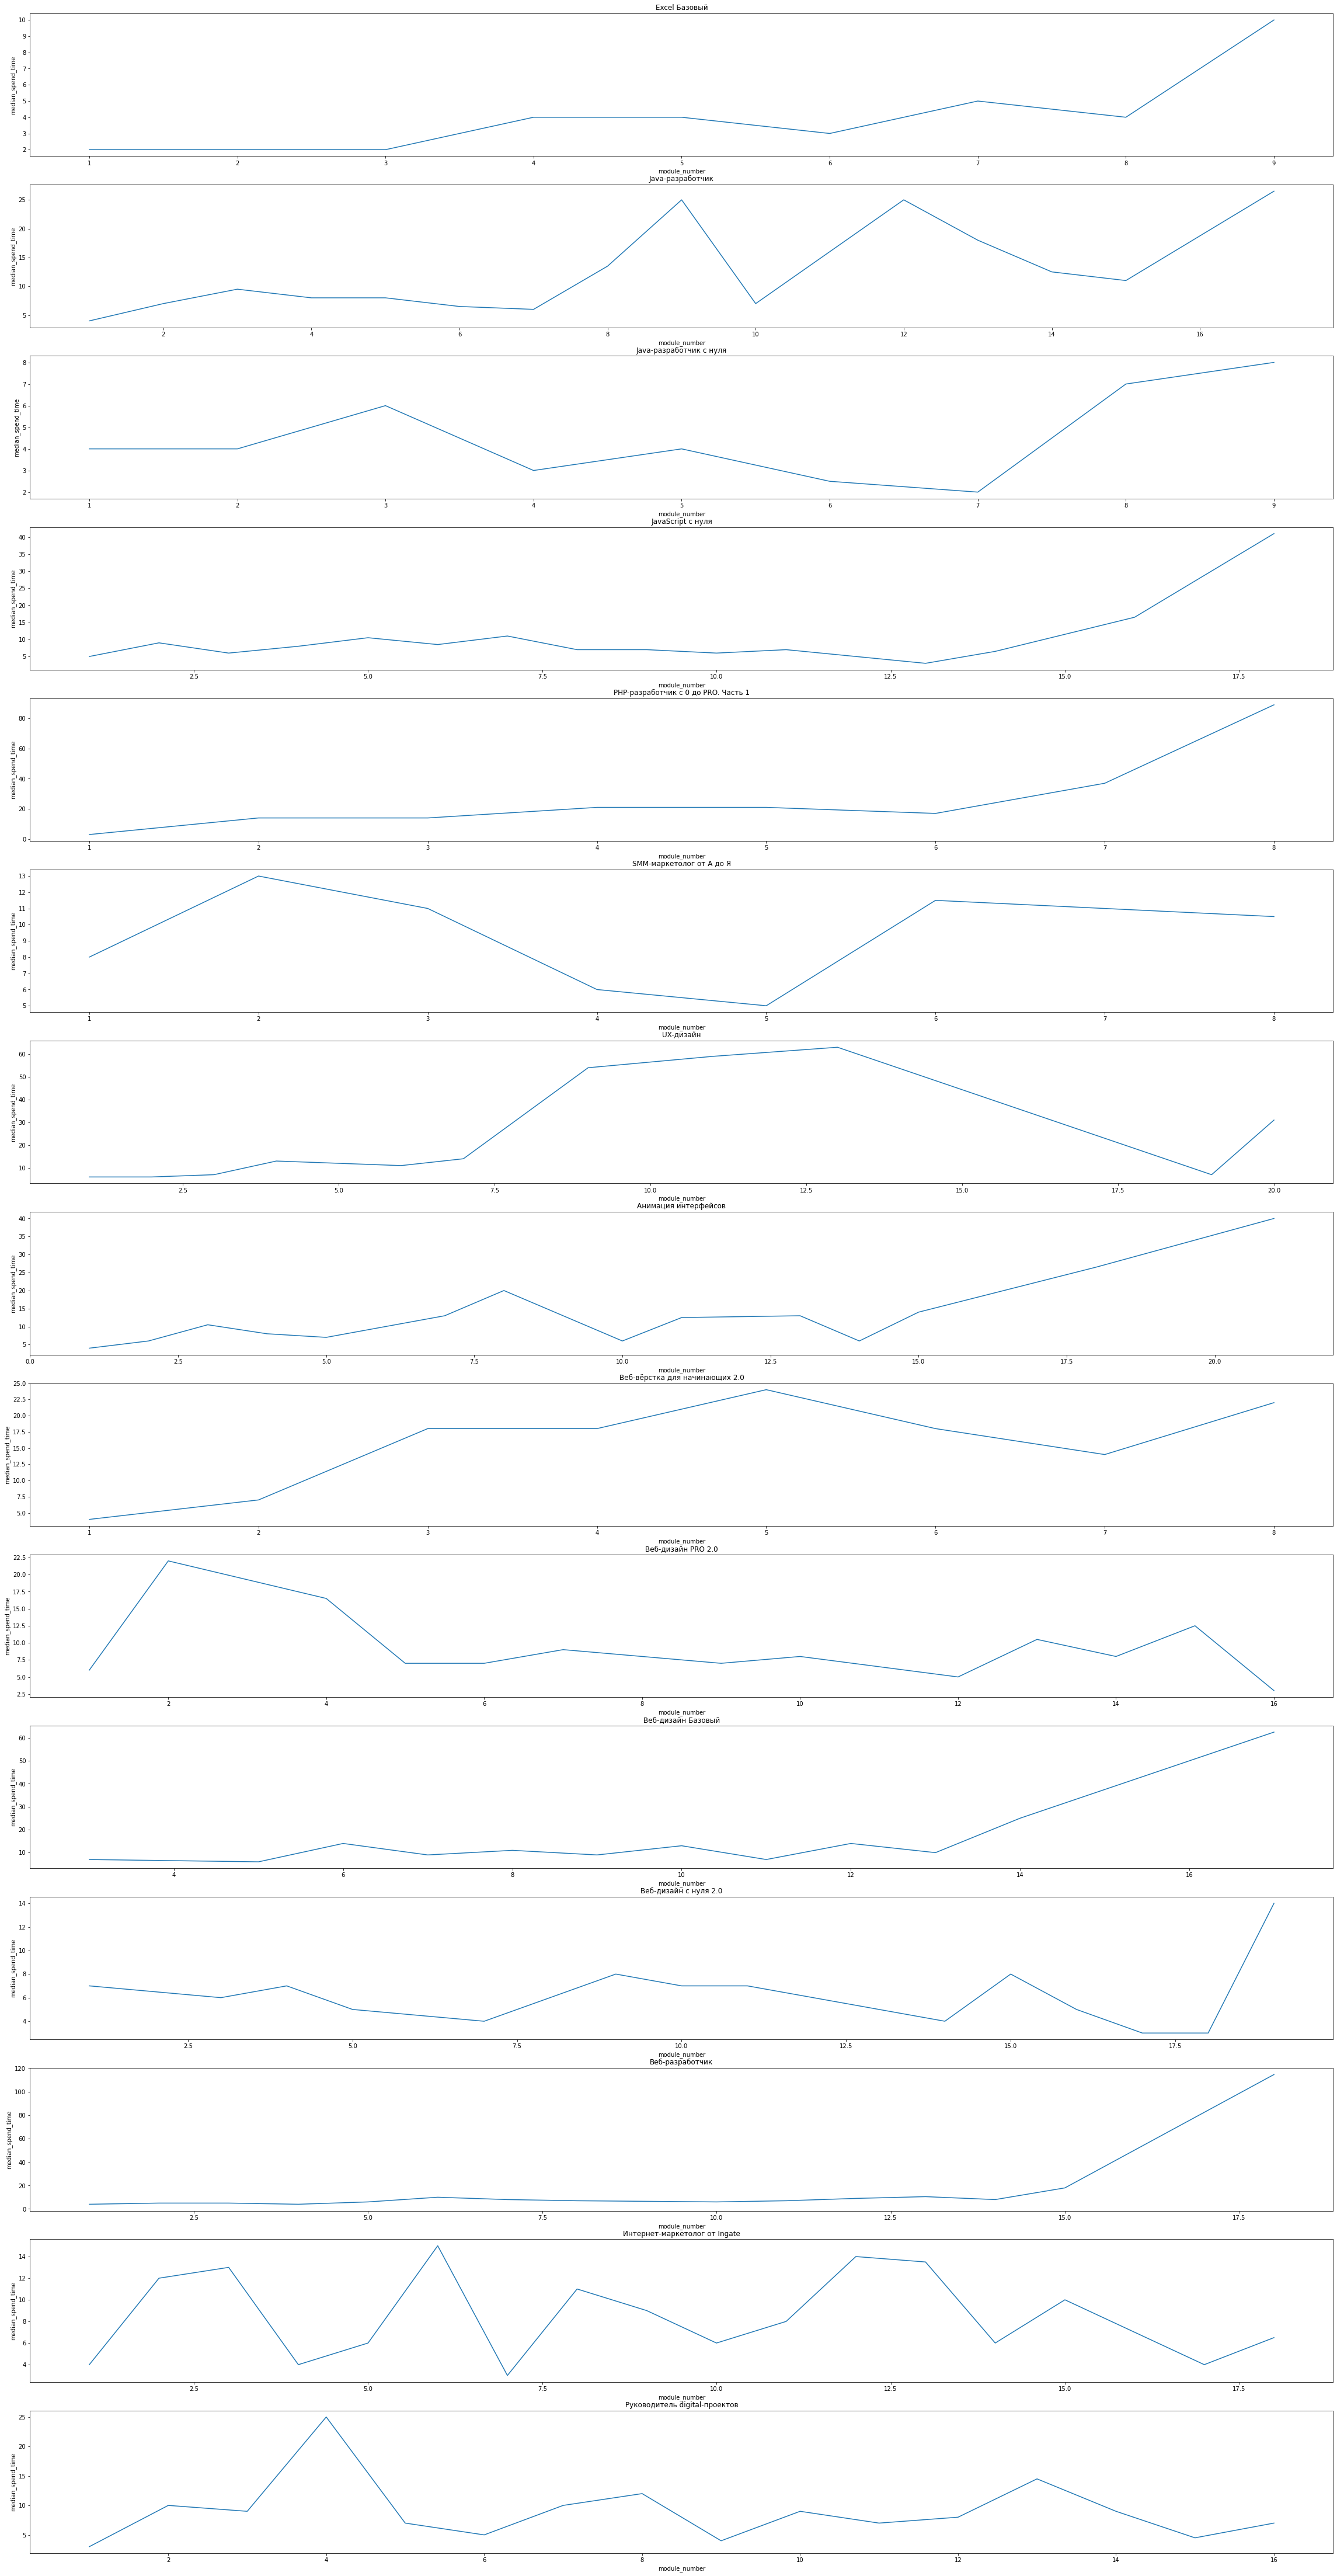

In [25]:
# создаем полотно с 15 графиками
fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(40, 80))
# в цикле строим 15 графиков для каждого курса
for n, name in enumerate(sorted((main['title'].drop_duplicates()).tolist())):
    sns.lineplot(data=modul_progss_1[modul_progss_1['title'] == name], x = 'module_number' , y = modul_progss_1[modul_progss_1['title'] == name].loc[:, 'time']['median'], ax = ax.ravel()[n])
    ax.ravel()[n].set_ylabel('median_spend_time')
    ax.ravel()[n].set_title(name)



In [26]:
# делаем реиндексацию для простоты дальнейшей работы
modul_progss = modul_progss.reset_index()
# создаем датарейндж для того, чтобы понять, когда делалось дз
modul_progss['month']= modul_progss[['start_date', 'finish_date']].apply(lambda x: pd.date_range(x['start_date'].replace(day=1, hour=0, minute=0, second=0, microsecond=0), x['finish_date'].replace(day=1,minute=0, second=0, microsecond=0), freq=pd.offsets.MonthBegin(1)), axis=1)
# расширяем построчно образовавшийся датарейндж
modul_progss=modul_progss.explode('month')
# извлекаем месяц в качестве числа для того, чтобы индексация правильно отсортировала
modul_progss['month']=modul_progss['month'].apply(lambda x: x.month)
# создаем датафрейм, в котором посредством группировки по названию курса и месяцу нахождится медианное время на дз помесячно
season=modul_progss.groupby(['title', 'month']).agg({'time':'median'}).reset_index()
# присваиваем месяцам имена
season['month']=season['month'].map({1:'Январь', 2:'Февраль', 3:'Март', 4:'Апрель', 5:'Май', 6:'Июнь', 7:'Июль',8:'Август', 9:'Сентябрь', 10:'Октябрь', 11:'Ноябрь', 12:'Декабрь'})
# проверяем датафрейм
print('Медианное время выполнения домашней работы по месяцам')
season


Медианное время выполнения домашней работы по месяцам


,title,month,time
0,Excel Базовый,Январь,2.0
1,Excel Базовый,Февраль,2.0
2,Excel Базовый,Март,3.0
3,Excel Базовый,Апрель,2.0
4,Excel Базовый,Май,3.0
...,...,...,...
166,Руководитель digital-проектов,Август,23.0
167,Руководитель digital-проектов,Сентябрь,20.0
168,Руководитель digital-проектов,Октябрь,14.0
169,Руководитель digital-проектов,Ноябрь,14.0


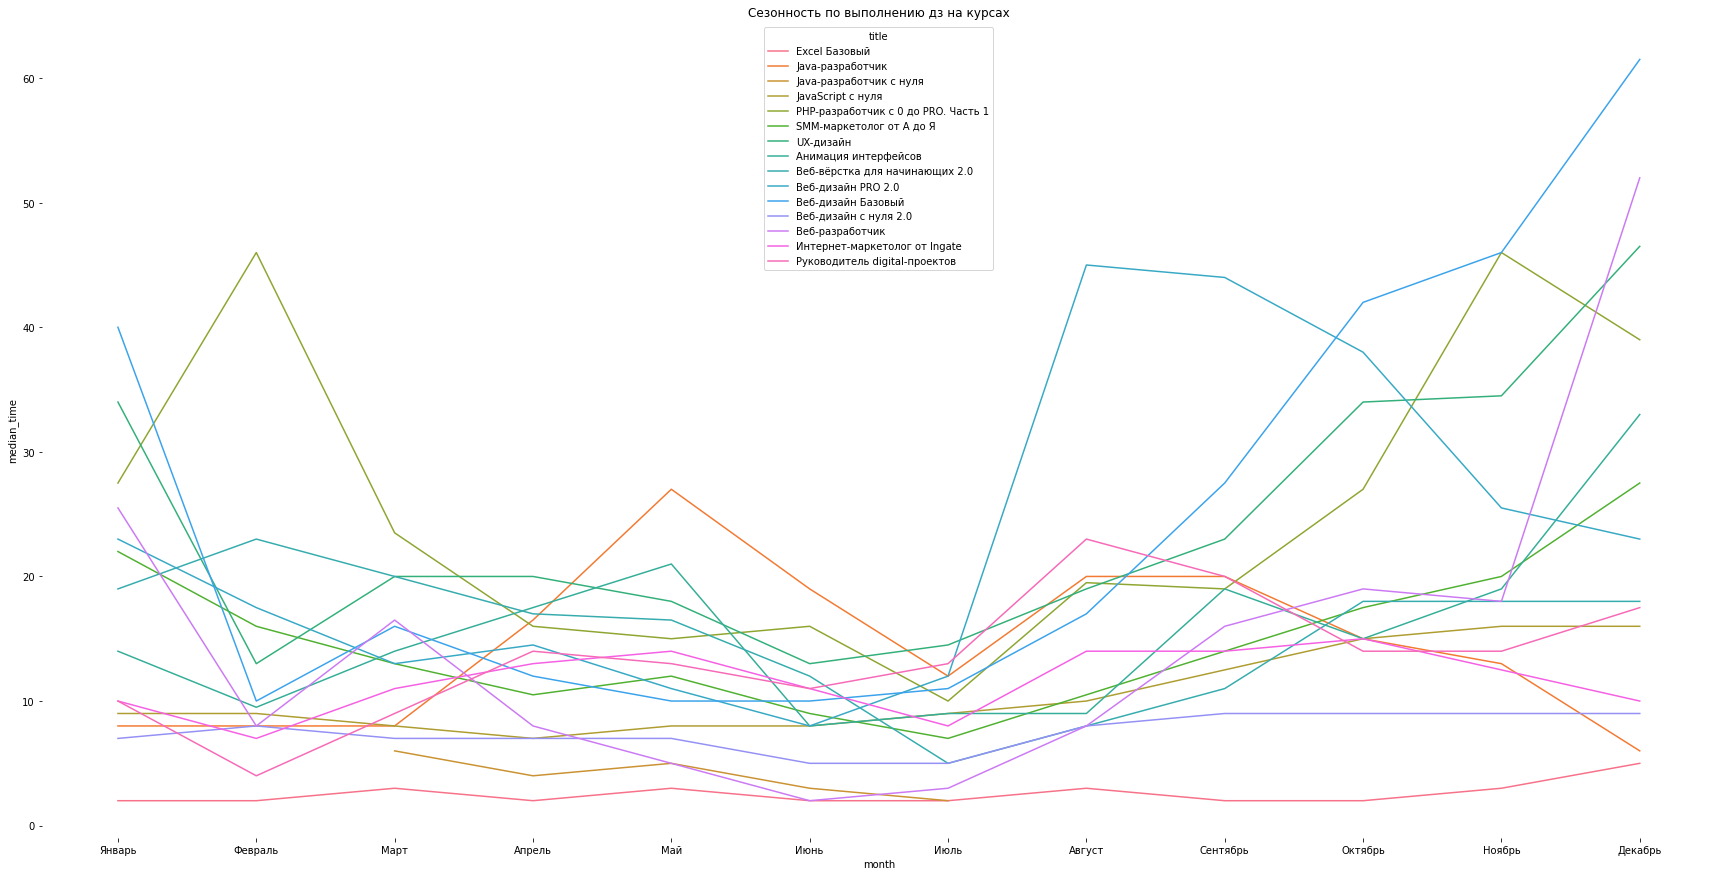

In [27]:
# создаем полотно с графиком
fig, ax = plt.subplots(ncols=1, nrows=1)
# устанавливаем размеры полотна
fig.set_figheight(15)
fig.set_figwidth(30)
# строим график сезонности по выполнению дз по всем курсам
sns.lineplot(data=season, x='month', y='time', hue='title')
# устанавливаем заголовок графика
ax.set_title('Сезонность по выполнению дз на курсах')
# меняем название оси у
ax.set_ylabel('median_time')
# убираем границы графика
sns.despine(left=True, bottom=True, right=True)

## Выводы по блоку 3 ###

Исходя из указанных выше данных, можно сделать следующие выводы:
* В среднем под конец обучения на последних модулях время прохождения увеличивается по всем курсам, кроме "Веб-дизайн PRO 2.0".
* Отмечаем, что время прохождения модулей небольшое и резко увеличивается к концу по следующим курсам: "Excel Базовый", "JavaScript с нуля", "РНР-разработчик с нуля до PRO. Часть 1", "Веб-дизайн Базовый", ""Веб-разработчик".
* В середине обучения у студентов возникают проблемы на следующих курсах: "UX-дизайн", "Java-разработчик"
* Отмечаем, что на "Веб-вёрстка для начинающих 2.0" уже на 3 модуле (из 8ми) у студентов значительно повышается время выполнения модуля.
* На курсе "SMM-маркетолог от А до Я" время прохождения модулей достаточно высокое, только модули 4 и 5 проходятся быстро.
* По курсам "Веб-дизайн PRO 2.0" и "РУководитель digital-проектов" трудности у студентов возникают только в начале обучения.
* Сложно выявить тенденции на курсе "Интернет-маркетолог от Ingate". Время прохождения обучения разнится от модуля к модулю то резко увеличиваясь, то резко опускаясь.
* В летний период (май, июнь, июль) студенты обучаются меньше. "Учебными" сезонами можно назвать зиму (ноябрь, декабрь, январь).


## 4. Расчет конверсии



In [28]:
### YOUR CODE HERE ###
# отбираем записи по каждому студенту
conversion = main[main.is_homework == True].groupby(['title', 'module_number', 'module_title', 'student_id']).agg({'start_date':'first','finish_date':'last'}).reset_index()
# делаем подсчет студентов в каждом модуле по каждому курсу начавших дз и окончивших дз
conversion = conversion.groupby(['title','module_number', 'module_title']).agg({'start_date':'count','finish_date':'count'}).reset_index()
# делаем сдвиг колонки, чтобы получить данные по каждому курсу и каждому модулю
# "начавшие модуль" и "окончившие предыдуший" как "start_date" и "finish_date" соответственно
finish=[]
for i in sorted(main.title.unique().tolist()):
#     сдвигаем массив, отвечающий заданному курсу, на один элемент, заполняя пропуск 0
    finish_date = conversion[conversion.title == i].finish_date.shift(1, fill_value=0)
#     добавляем поочередно значение в
    for j in finish_date:
        finish.append(j)
# присваиваем получившиеся сдвинутые данные
conversion['finish_date'] = finish
# считаем конверсию
conversion['conver'] = round((conversion.start_date / conversion.finish_date) * 100)
# смотрим результат
print('Конверсия перехода студентов из одного модуля в другой на каждом курсе')
conversion.head()

Конверсия перехода студентов из одного модуля в другой на каждом курсе


,title,module_number,module_title,start_date,finish_date,conver
0,Excel Базовый,1,Основной функционал Excel,518,0,inf
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,458,95.0
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,406,98.0
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,387,89.0
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,303,98.0


*Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).')*

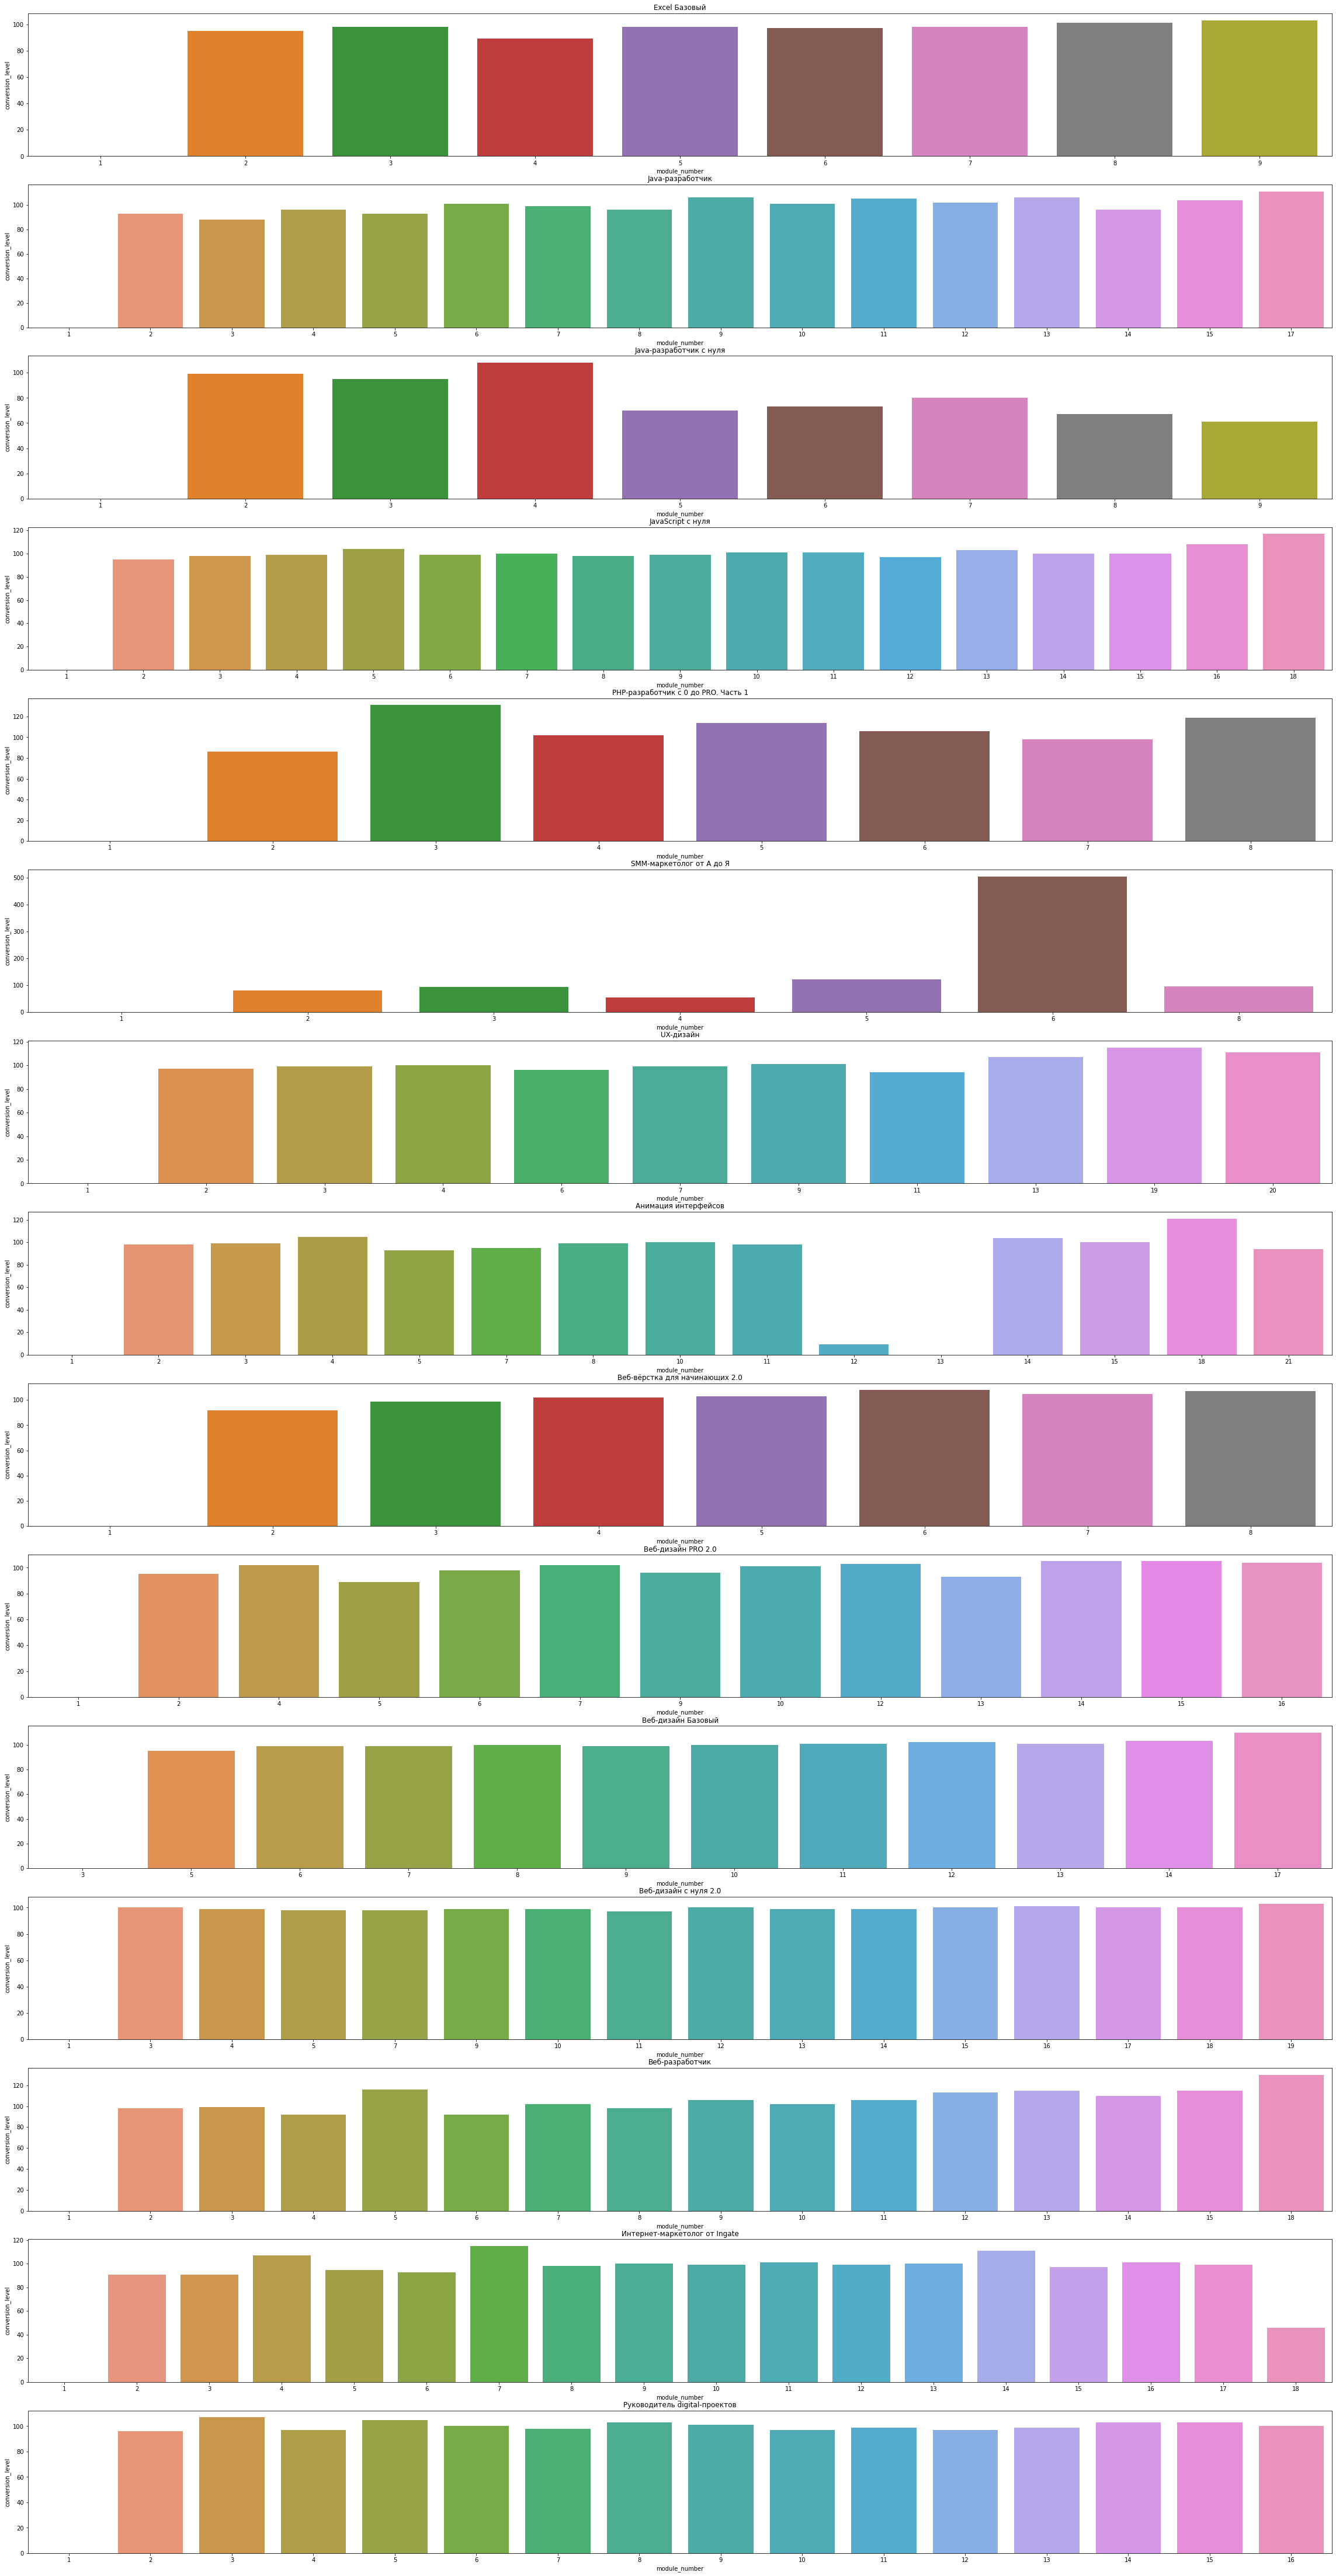

In [29]:
# создаем полотно с 15 графиками
fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(40, 80))
# в цикле строим 15 графиков для каждого курса
for n, name in enumerate(sorted(main.title.unique().tolist())):
#   строим барплот 
    sns.barplot(data=conversion[conversion['title'] == name], x = 'module_number' , y = 'conver', ax = ax.ravel()[n])
#   даем название оси у
    ax.ravel()[n].set_ylabel('conversion_level')
#   даем название графику  
    ax.ravel()[n].set_title(name)

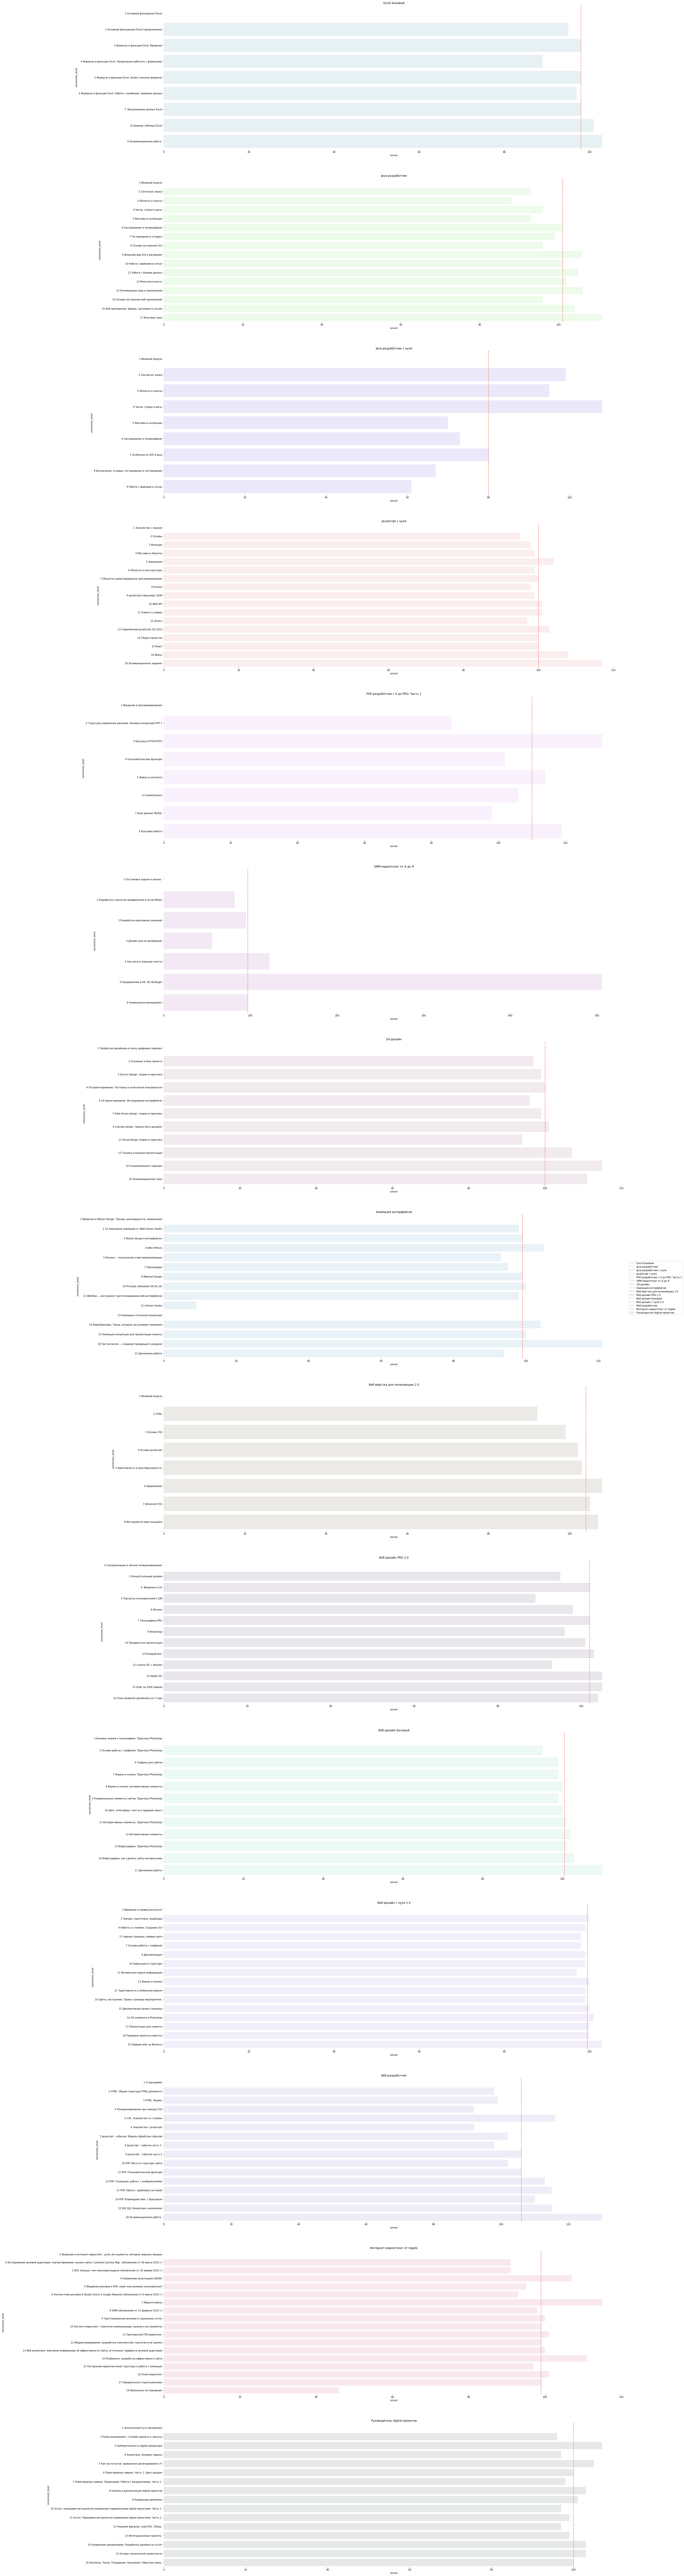

In [30]:
# соединяем номер модуля и его название в новой колонке, чтобы выполнить условие поставленной задачи 
conversion['mod_n_t'] = conversion.module_number.astype(str) + ' ' + conversion.module_title
# создаем полотно с 15 графиками
fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(35, 200))
# в цикле строим 15 графиков для каждого курса
for n, name in enumerate(sorted(main.title.unique().tolist())):
#   рисуем барплот с прсвоением лейблу названия курса и прозрачности .1
    sns.barplot(data=conversion[conversion['title'] == name], x = 'conver' , y = 'mod_n_t', ax = ax.ravel()[n], orient='h', color=np.random.rand(3,), label=name, alpha=.1)
#   устанавливаем название оси у   
    ax.ravel()[n].set_ylabel('conversion_level')
#   даем название графику    
    ax.ravel()[n].set_title(name)
#   строим линию по медиане
    ax.ravel()[n].axvline(conversion[conversion['title'] == name].conver.median(),linewidth=2, linestyle='--', color='salmon')
#   убираем границы  
    sns.despine(left=True, bottom=True, right=True)    
# добавляем легенду
fig.legend(loc=5)

## Выводы по блоку 4 ##

Исходя из найденных выше данных, можно сделать следующие выводы:
* По курсу "Excel Базовый" существуют проблемы с домашним заданием в модуле 3, так как конверсия студентов минимальная.
* На курсе "Java-разработчик" студентам сложно в начале обучения, однако во второй половине обучения конверсия достаточно высокая, за исключением модуля 14.
* На курсе "Java-разработчик с нуля" студенты испытывают трудности после 4 модуля (из 9).
* На курсе "JavaScript с нуля" студенты в целом проходят системно все модули, конверсия высокая. Однако многие переходят раньше к экзаменационной работе, возможно, чтобы быстрее начать проект и/или начинают делать экзаменационную работу еще в процессе обучения.
* Курс "PHP-разработчик с 0 до PRO. Часть 1" дается достаточно сложно студентам. По большей части модулей конверсия из модуля в модуль ниже медианного значения.
* На курсе "SMM-маркетолог от А до Я" наибольший интерес вызывает у студентов модуль по продвежению в  VK, FB, MyTarget.
* На курсу "UX-дизайн" студентов интересуют последние модули, так как на них конверсия более 100%. Проблемными можно назвать модули 6 и 11.
* По курсу "Анимация интерфейсов" однозначно выделяются модули 12 и 13, где конверсия минимальная или её вообще нет. Следует поработать над данными модулями.
* На курсе "Веб-вёрстка для начинающих 2.0" студенты испытывают трудности в начале обучения, однако к середине обучения таких проблем не возникает.
* По курсу "Веб-дизайн PRO 2.0" проблемными являются модули 5 и 13, больший интерес проявляется к модулям 14, 15, 16.
* На курсе "Веб-дизайн Базовый" студенты часто переходят к последнему модулю "Домашняя работа" раньше, чем окончат предыдущие модули.
* На курсе "Веб-дизайн с нуля 2.0" стоит обратить внимание на модуль 11.
* На курсе "Веб-разработчик" к модулям в конце обучения преступают раньше, чем в начале.
* На курсе "Интернет-маркетолог от Ingate" повышен интерес студентов к модулям 4, 7, 14. Однако финальное тестирование делает только половина. 
* В целом на курсе "Руководитель digital-проектов" хорошая конверсия студентов, обучения проходится студентами планово.